In [1]:
import netCDF4 as nc
from pathlib import Path
import glob

#Array 
import xarray as xr
import numpy as np
import datetime as dt
import pandas as pd
import dask

#Visualize
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import cmcrameri.cm as cmc # batlow colourmap

#large data visualization
import datashader as ds
from datashader import transfer_functions as tf, reductions as rd

# Analyse
from scipy import signal
from scipy.interpolate import BSpline

#import tqdm
import seaborn as sns

#to reload
import importlib

plt.style.use('bmh')

In [2]:
import Functions2Plot as f2plot
import utils

In [3]:
importlib.reload(f2plot)
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\gezas\\kDrive\\SIE-Project\\CL61\\Code\\utils.py'>

In [4]:
COLOR_MAP = 'cmc.batlow'

# Initialize

In [5]:
# Get data folder
#ceil_path = str(Path(r'C:\Users\gezas\Documents\CL61\Data'))      ## My portable PC
ceil_path = str(Path(r'D:\gezas\switchdrive\Private\CL61\Data'))  ## MY FIX PC
all_data_files = glob.glob(ceil_path + '/*.nc')

# Set datetime as index
get_file_datetime = list(map(lambda date_str: pd.to_datetime(date_str, format='%Y%m%d_%H%M%S'),
                             [path_name[-18:-3] for path_name in all_data_files]))

df_data_files = pd.DataFrame([all_data_files, get_file_datetime], index=['file_name_path', 'Datetime']).T
df_data_files.index = get_file_datetime
df_data_files = df_data_files.sort_index()
df_data_files.head()

,file_name_path,Datetime
2023-02-03 00:02:10,D:\gezas\switchdrive\Private\CL61\Data\live_20...,2023-02-03 00:02:10
2023-02-03 00:07:10,D:\gezas\switchdrive\Private\CL61\Data\live_20...,2023-02-03 00:07:10
2023-02-03 00:12:10,D:\gezas\switchdrive\Private\CL61\Data\live_20...,2023-02-03 00:12:10
2023-02-03 00:17:10,D:\gezas\switchdrive\Private\CL61\Data\live_20...,2023-02-03 00:17:10
2023-02-03 00:22:10,D:\gezas\switchdrive\Private\CL61\Data\live_20...,2023-02-03 00:22:10


# Open dataset

In [6]:
# %%timeit -r 1 -n 1

# specify the period for analysis
start_data = '2023-02-04 00:00:00'
end_data = '2023-02-05 00:00:00'
selected_data = df_data_files[df_data_files['Datetime'].between(start_data, end_data)].copy()

In [5]:
# Open dataset
#dataset = xr.open_mfdataset(selected_data['file_name_path'], chunks = {'time':300})
#dataset = xr.open_dataset("temp_1d_test.nc")
dataset = xr.open_dataset("temp_20230204.nc")

In [8]:
dataset['time'].values

array(['2023-02-03T23:57:10.712999936', '2023-02-03T23:58:10.717999872',
       '2023-02-03T23:59:10.752999936', ...,
       '2023-02-04T23:54:10.795000064', '2023-02-04T23:55:10.874000128',
       '2023-02-04T23:56:10.969000192'], dtype='datetime64[ns]')

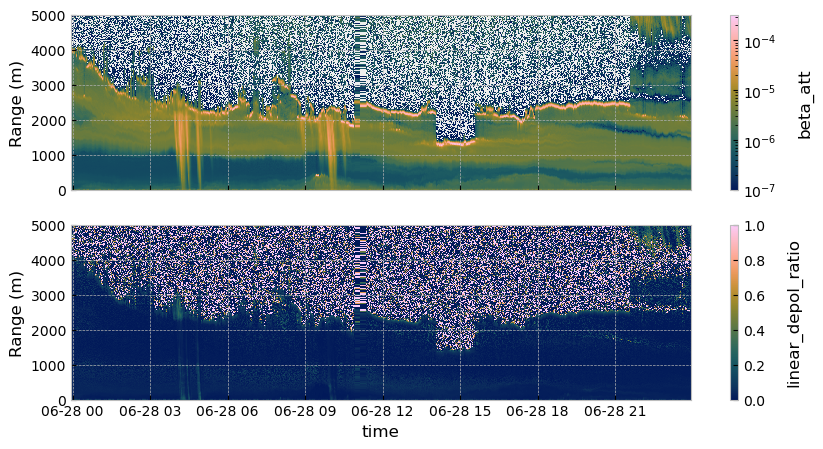

In [34]:
f2plot.plotCL61AsColomersh(dataset, hlims=[0, 5000], color_map=COLOR_MAP)

c:\Users\gezas\.conda\envs\Atm\Lib\site-packages\xarray\core\computation.py:761: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


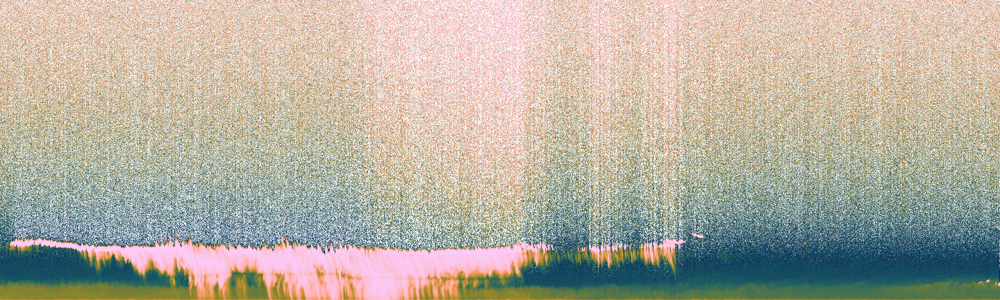

In [6]:
# Create a Datashader Canvas
cvs = ds.Canvas(plot_width=300, plot_height=100)

# Log-transform the data
log_back_att_arr = np.log10(dataset['beta_att'])

# Define the color map and normalization
color_map = COLOR_MAP
vmin = 1e-9
vmax = 1e-4
#color_mapper = ds.transfer_functions.dv.CMap(color_map)
color_range = [vmin, vmax]

# Create the plot
img = tf.shade(log_back_att_arr.T, cmap=cmc.batlow)

# Display the plot using Matplotlib or another plotting library
tf.set_background(img, "white").to_pil().resize((1000, 300))

# Colormaps

In [15]:
BATLOW_7COLORS  = [{"name":"Fairy Tale","hex":"FBC5E6","rgb":[251,197,230],"cmyk":[0,22,8,2],"hsb":[323,22,98],"hsl":[323,87,88],"lab":[85,24,-9]},
                   {"name":"Olive","hex":"88842B","rgb":[136,132,43],"cmyk":[0,3,68,47],"hsb":[57,68,53],"hsl":[57,52,35],"lab":[54,-10,47]},
                   {"name":"Fern green","hex":"4C734B","rgb":[76,115,75],"cmyk":[34,0,35,55],"hsb":[119,35,45],"hsl":[119,21,37],"lab":[45,-22,18]},
                   {"name":"Penn Blue","hex":"03245C","rgb":[3,36,92],"cmyk":[97,61,0,64],"hsb":[218,97,36],"hsl":[218,94,19],"lab":[16,14,-37]},
                   {"name":"Butterscotch","hex":"D69444","rgb":[214,148,68],"cmyk":[0,31,68,16],"hsb":[33,68,84],"hsl":[33,64,55],"lab":[66,17,51]},
                   {"name":"Melon","hex":"FCAC99","rgb":[252,172,153],"cmyk":[0,32,39,1],"hsb":[12,39,99],"hsl":[12,94,79],"lab":[78,27,22]},
                   {"name":"Midnight green","hex":"115362","rgb":[17,83,98],"cmyk":[83,15,0,62],"hsb":[191,83,38],"hsl":[191,70,23],"lab":[32,-14,-14]}]

COLOR_CODES_BLUE_YEL = ['#03245C', '#D69444']

In [11]:
cmcrameri.show_cmaps()

NameError: name 'cmcrameri' is not defined

In [ ]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            layout='constrained', squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

## Other way to directly plot xrray

In [ ]:
lims = [1e-7,1e-4]
hlims = [0,5000]
var1_arr = dataset['beta_att']
var2_arr = dataset['linear_depol_ratio']
fig, axs = plt.subplots(2,1, figsize=(10,5))

var1_arr.plot(x= 'time', y = 'range', ax = axs[0], vmin= lims[0], vmax = lims[1],
               norm=colors.LogNorm(vmin=lims[0], vmax=lims[1]), ylim = hlims)

var2_arr.plot(x = 'time', y = 'range', cmap='Spectral_r', vmin=0, vmax=1, ax=axs[1], ylim=hlims)



# Filter out noisy part

kernel size [5, 5]


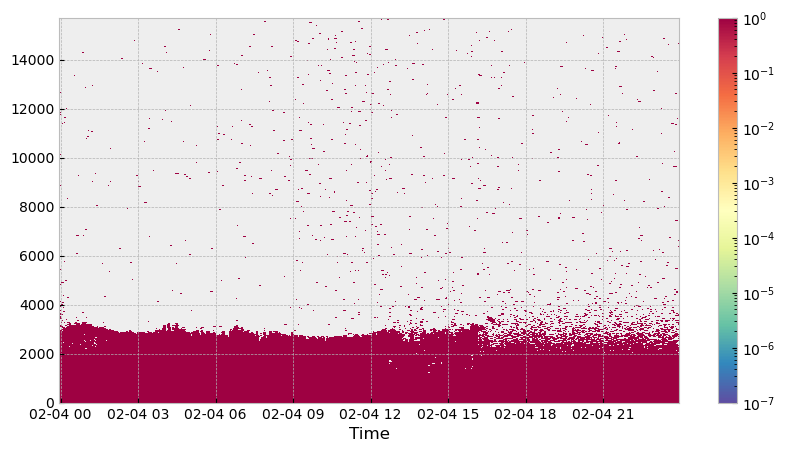

In [7]:
null_mask_beta_att = utils.non_null_windows_mask(dataset, 'beta_att', [5, 5])
f2plot.plotMasColormesh(null_mask_beta_att, dataset["time"], dataset["range"], color_vmax=1)

kernel size [1, 3]


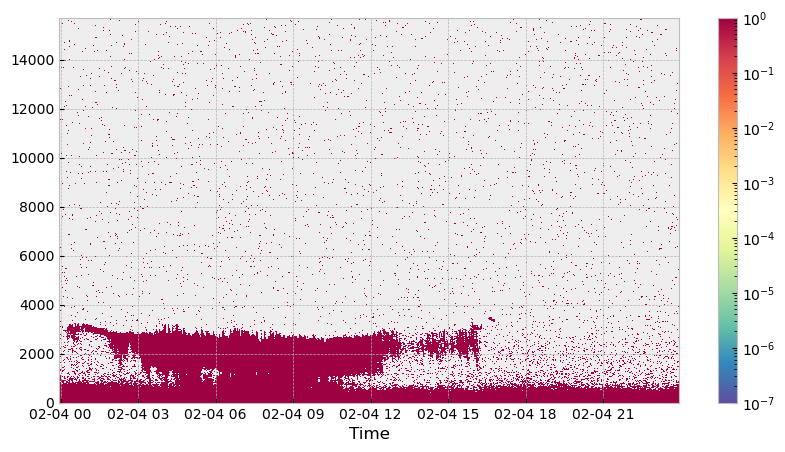

In [8]:
null_mask_lin= utils.non_null_windows_mask(dataset, 'linear_depol_ratio', [1, 3], analysis_type='range')
f2plot.plotMasColormesh(null_mask_lin, dataset["time"], dataset["range"], color_vmax=1)

In [9]:
dataset['linear_depol_ratio_clean'] = xr.where(np.fabs(dataset['linear_depol_ratio'])<0.15, np.fabs(dataset['linear_depol_ratio']), dataset['linear_depol_ratio'])
null_mask_lin = utils.moving_window_in_range(dataset['linear_depol_ratio_clean'].T.values, window_size=2)
null_mask_lin = ~null_mask_lin

kernel size (2, 2)


In [10]:
diff_mask = ((null_mask_beta_att.astype(int)-null_mask_lin.astype(int))==1)
values_lin_depol = np.where(diff_mask, np.fabs(dataset['beta_att'].T.values), np.nan)

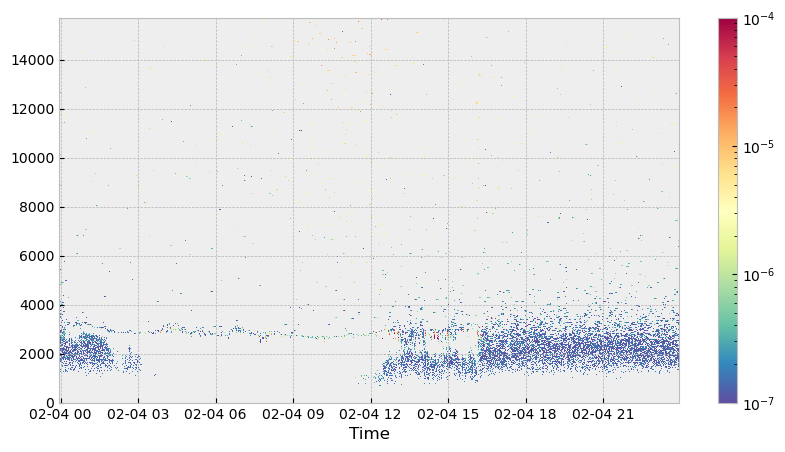

In [11]:
f2plot.plotMasColormesh(values_lin_depol, x=dataset['time'].values, y= dataset['range'].values)

# Cleaned results

In [12]:
final_mask = np.logical_and(null_mask_beta_att, null_mask_lin)
to_interpolate_mask = ((null_mask_beta_att.astype(int)-null_mask_lin.astype(int))==1)

In [13]:
dataset['beta_att_clean'] = xr.where(final_mask.T, dataset['beta_att'], np.nan)
dataset['linear_depol_ratio_clean'] = xr.where(final_mask.T, dataset['linear_depol_ratio_clean'], np.nan)

# Results visualisation

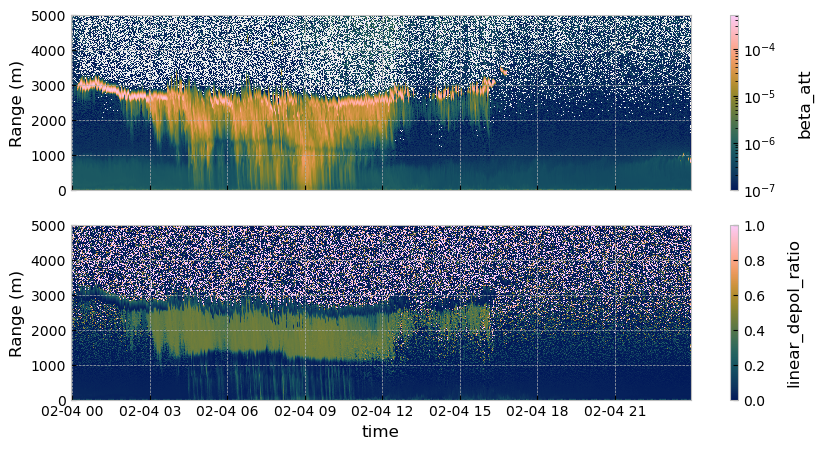

In [231]:
f2plot.plotCL61AsColomersh(dataset, hlims=[0, 5000], color_map=COLOR_MAP)

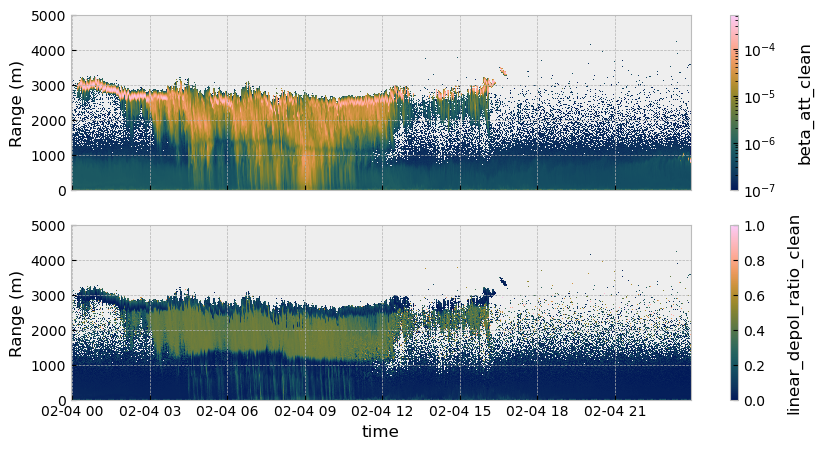

In [254]:
f2plot.plotCL61AsColomersh(dataset, variable_names=['beta_att_clean', 'linear_depol_ratio_clean'], scales=['log', 'lin'], hlims=[0,5000], color_map = COLOR_MAP)

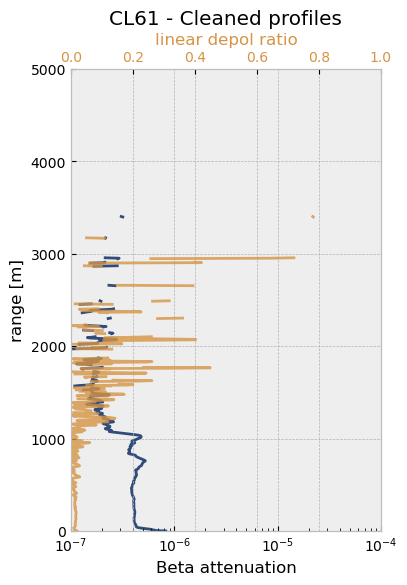

In [16]:
#t_wished = ["2023-02-05 00:00:00", "2023-02-05 12:00:00"]
t_wished = "2023-02-04 23:45:00"
f2plot.plotVerticalProfiles(dataset, time_period=t_wished, var_names=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                             hlims=[0,5000],
                             title = 'CL61 - Cleaned profiles',
                             plot_colors=COLOR_CODES_BLUE_YEL)

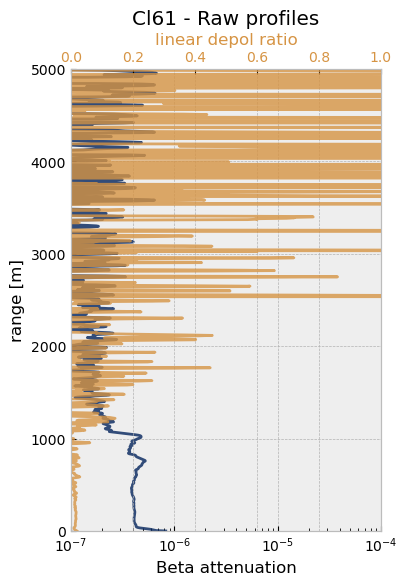

In [17]:
f2plot.plotVerticalProfiles(dataset, time_period=t_wished, var_names=['beta_att', 'linear_depol_ratio', 'range'], hlims=[0,5000], 
                            title = 'Cl61 - Raw profiles', plot_colors=COLOR_CODES_BLUE_YEL)

# 3D visualisation

# K-Means tests

In [70]:
def standardize(array, min_value, max_value):
    standardized_array = (array - min_value)/(max_value-min_value)
    return standardized_array

def dataset_to_sample_feature(dataset, variable_names = ['beta_att_clean', 'linear_depol_ratio_clean', 'range'], transforms = ['log', 'lin', 'lin']):
    for element_id, variable_name in enumerate(variable_names):
        feature_array = dataset[variable_name].T.values.flatten()

        if transforms[element_id]=='log':
            if np.any(feature_array<0):
                print('weird')
            else:
                feature_array = np.log10(feature_array)
        
        if element_id == 0:
            feature_matrix = feature_array.reshape((feature_array.size, 1))
        else:
            if feature_array.size != feature_matrix.shape[0]:
                feature_array = np.repeat(feature_array, feature_matrix.shape[0] // feature_array.size)

            feature_matrix = np.hstack((feature_matrix, feature_array))
    
    # Get all rows where there is a NaN value
    nan_rows = np.isnan(feature_matrix).any(axis=1)

    # Remove rows with NaN values
    cleaned_feature_matrix = feature_matrix[~nan_rows, :]

    return cleaned_feature_matrix


In [105]:
def dataset_to_sample_feature(dataset, variable_names=['beta_att_clean', 'linear_depol_ratio_clean', 'range'], transforms=['log', 'lin', 'lin']):
    # Create an empty list to store transformed feature arrays
    feature_arrays = []
    array_size = dataset['time'].size*dataset['range'].size

    for variable_name, transform in zip(variable_names, transforms):
        feature_array = dataset[variable_name].T.values

        # Handle the 'log' transformation
        if transform == 'log':
            if np.any(feature_array < 0):
                # Handles negative or zero values by adding a small offset (1e-10) before taking the logarithm
                print(f"Warning: Found negative or zero values in '{variable_name}'. Log transformation may result in NaN.")
                feature_array = np.log10(np.maximum(feature_array, 1e-10))
            else:
                feature_array = np.log10(feature_array)

        if feature_array.size != array_size:
            feature_array = np.repeat(feature_array, array_size//feature_array.size)

        feature_arrays.append(feature_array.flatten())

    # Stack the feature arrays vertically to create a feature matrix
    original_feature_matrix = np.column_stack(feature_arrays)
    print(original_feature_matrix.shape)

    # Remove rows with NaN values
    nan_rows = np.isnan(original_feature_matrix).any(axis=1)
    cleaned_feature_matrix = original_feature_matrix[~nan_rows]

    return original_feature_matrix, nan_rows, cleaned_feature_matrix


In [123]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


feature_matrix, nan_rows, cleaned_feature_matrix = dataset_to_sample_feature(dataset=dataset,
                                                                             variable_names=['beta_att_clean', 'linear_depol_ratio_clean'])

# Try with standardisation
scaler = StandardScaler()
feature_matrix_standardized = scaler.fit_transform(cleaned_feature_matrix)

# Specify the number of clusters (k)
k = 8  # You can adjust this value as needed

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0, tol=1e-5)
cluster_labels = kmeans.fit_predict(feature_matrix_standardized)

# Create an array to store cluster labels with NaN rows
full_shape_labels = np.full((feature_matrix.shape[0],), np.nan)

# Fill in the cluster labels for rows without NaN values
full_shape_labels[~nan_rows] = cluster_labels

# Reshape the labels to the original shape (time x range)
original_shape_labels = full_shape_labels.reshape(dataset['beta_att_clean'].T.shape)

# Now, 'original_shape_labels' contains the cluster labels in the shape of time x range

(4717440, 2)


c:\Users\gezas\.conda\envs\Atm\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [124]:
print(f'means: {scaler.mean_}')
print(f'scales: {scaler.scale_}')

means: [-5.90966547  0.15507707]
scales: [0.82867341 0.16822378]


In [125]:
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

# Define the original colormap (e.g., 'viridis')
original_cmap = plt.get_cmap(COLOR_MAP)

# Define the number of discrete categories
num_categories = k  # Adjust as needed

# Create a list of evenly spaced values to sample the colormap
color_values = np.linspace(0, 1, num_categories)

# Sample the original colormap at the specified values
discrete_colors = original_cmap(color_values)

# Create a custom ListedColormap with the discrete colors
discrete_cmap = mcolors.ListedColormap(discrete_colors)

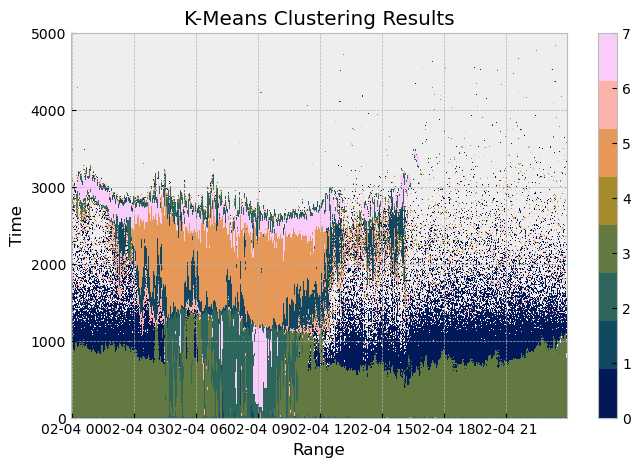

In [126]:
plt.figure(figsize=(8, 5))  # Set the figure size as needed

# Create a colored mesh plot using the custom colormap
plt.pcolormesh(dataset['time'], dataset['range'], original_shape_labels,
               cmap=discrete_cmap, vmin=0, vmax=num_categories - 1)

# Add a colorbar with discrete color labels
norm = plt.Normalize(vmin=0, vmax=num_categories - 1)
cbar = plt.colorbar(cmap=discrete_cmap, ticks=range(num_categories))
cbar.set_ticklabels(range(num_categories))  # Set labels to category indices

# Set labels for x and y axes (if needed)
plt.ylim([0,5000])
plt.xlabel('Range')
plt.ylabel('Time')

# Set the title of the plot (if needed)
plt.title('K-Means Clustering Results')

# Show the plot
plt.show()

c:\Users\gezas\.conda\envs\Atm\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gezas\.conda\envs\Atm\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gezas\.conda\envs\Atm\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\gezas\.conda\envs\Atm\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

Text(0.5, 1.0, 'K-Means: Inertia for cluster numbers')

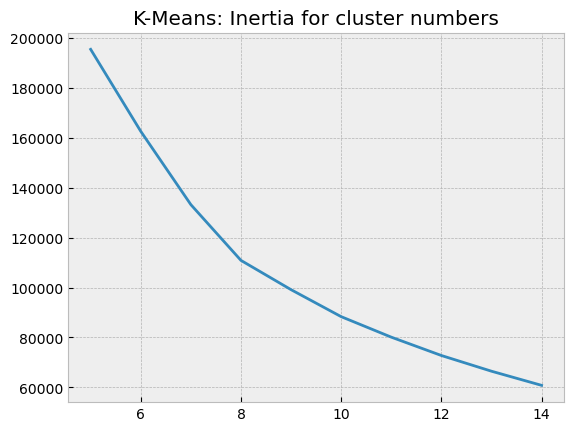

In [127]:
Sum_of_squared_distances = []
K = range(5,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(feature_matrix_standardized)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances)
plt.title('K-Means: Inertia for cluster numbers')

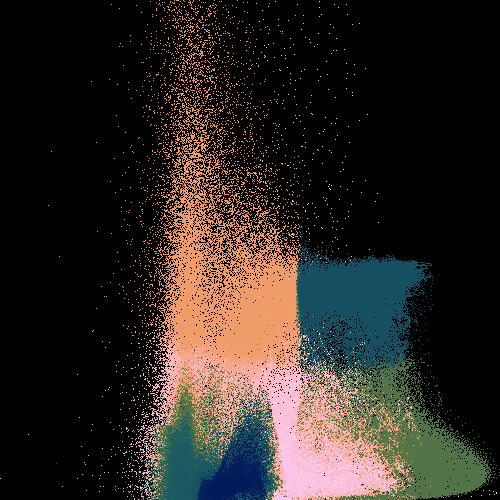

In [122]:
import datashader as ds
import datashader.transfer_functions as tf
import cmcrameri.cm as cmc

# Assuming 'cleaned_feature_matrix' is your feature matrix
df = pd.DataFrame({'log10_Beta_att': cleaned_feature_matrix[:, 0],
                   'Linear_depol': cleaned_feature_matrix[:, 1],
                   'Cluster_Labels': cluster_labels})

cvs = ds.Canvas(plot_width=500, plot_height=500)
agg = cvs.points(df, 'log10_Beta_att', 'Linear_depol', ds.mean('Cluster_Labels'))

# Use the color map you defined earlier
colors_rgb = (discrete_colors[:,0:3] * 255).astype(int)
color_key = dict(enumerate(colors_rgb))

# Create a custom colormap in a format that Datashader can use
#cmap = tf.color_map(builders=[colors_rgb.tolist()], name="custom_cmap")


img = tf.shade(agg, cmap=cmc.batlow)

# Display the plot
tf.set_background(img, 'black')

In [62]:
dataset2 = xr.open_dataset("temp_1d_test.nc")

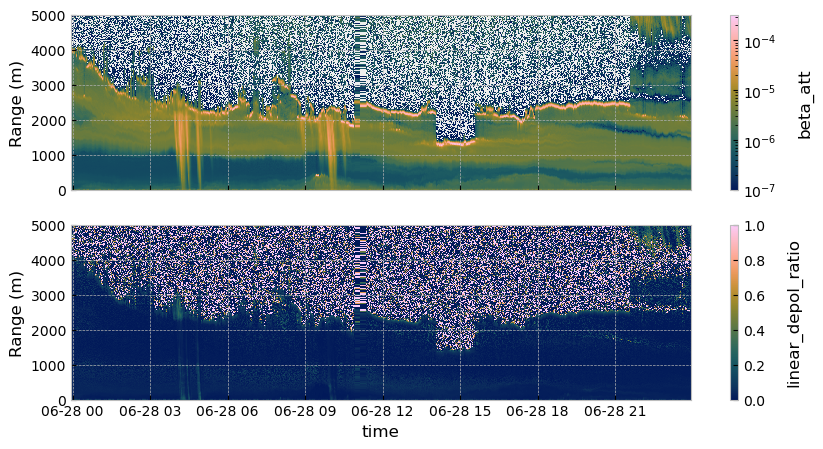

In [63]:
f2plot.plotCL61AsColomersh(dataset2, hlims=[0, 5000], color_map=COLOR_MAP)

In [129]:
feature_matrix, nan_rows, cleaned_feature_matrix = dataset_to_sample_feature(dataset=dataset2,
                                                                             variable_names=['beta_att_clean', 'linear_depol_ratio_clean'])

# Try with standardisation
scaler = StandardScaler()
feature_matrix_standardized = scaler.fit_transform(cleaned_feature_matrix)

cluster_labels = kmeans.predict(feature_matrix_standardized)

# Create an array to store cluster labels with NaN rows
full_shape_labels = np.full((feature_matrix.shape[0],), np.nan)

# Fill in the cluster labels for rows without NaN values
full_shape_labels[~nan_rows] = cluster_labels

# Reshape the labels to the original shape (time x range)
original_shape_labels = full_shape_labels.reshape(dataset['beta_att_clean'].T.shape)

KeyError: 'beta_att_clean'